# Visualizations

In [25]:
# Visualizations 

import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
# 2nd calibration 5 max iterations 

In [27]:
# Load files
with open('visuals.pkl', 'rb') as f:
    visuals = pickle.load(f)


with open('param_space_final.pkl', 'rb') as f:
    param_space = pickle.load(f)



# Calculate initial sample set's inadecuacy

initial = param_space["definition"].set_index("parameter")["value"].transpose().to_frame().T
initial.reset_index(drop=True, inplace=True)
initial['inadequacy']= 20.75489

# Top 5 performers
optimal_samples5 = param_space["space"].nsmallest(5, 'inadequacy')
optimal_samples5

,dpb_beta_homemaker,dpb_beta_retired,dpb_beta_fulltime,dpb_beta_parttime,dpb_beta_selfemployed,dpb_beta_unemployed,dpb_beta_female_travel,dpb_beta_age2025_travel,dpb_beta_age2635_travel,dpb_beta_age3650_travel,...,tmdo_beta_female_share3,tmdo_beta_female_motor,tmdo_beta_female_taxi,tmdo_beta_female_SMS,tmdo_beta_female_Rail_SMS,tmdo_beta_female_walk,tmdo_beta_female_SMS_Pool,tmdo_beta_female_Rail_SMS_Pool,dpb_cons_travel,inadequacy
8,-6.479909,1.745913,-2.083886,-0.512290,0.564482,0.769772,0.691969,0.441136,-0.601609,0.577759,...,2.489497,1.319364,-0.040068,4.678905,1.010238,1.026525,0.815490,-0.408686,0.958814,17.037864
16,1.712741,1.090744,3.345836,2.648764,2.856375,1.287960,-0.005720,-0.398977,-2.545069,-3.762880,...,2.483621,-0.347793,2.593932,0.948187,-0.556733,1.375716,-0.759640,1.359958,2.484103,17.101248
2,-4.646272,-0.226650,0.076421,0.374375,-0.800155,-0.741941,1.512513,-0.026085,-0.115682,-0.182928,...,3.337393,-0.533327,-1.330115,4.397840,1.044504,0.842932,-0.967966,-0.666040,0.526754,17.105202
20,1.121443,0.632920,3.252901,4.077210,2.991579,-0.351047,-0.401551,-0.907979,-2.904796,-3.296020,...,1.998923,0.436856,2.149926,2.472382,2.454114,3.598698,1.160410,0.038826,3.165324,17.142394
4,-7.364318,1.967575,-0.302517,-1.944747,-1.193864,-1.038224,-1.825365,-1.498802,0.369980,0.233072,...,3.153347,0.201355,-3.075466,5.352425,1.502471,0.207859,-2.839708,-1.658212,-0.419235,17.237254


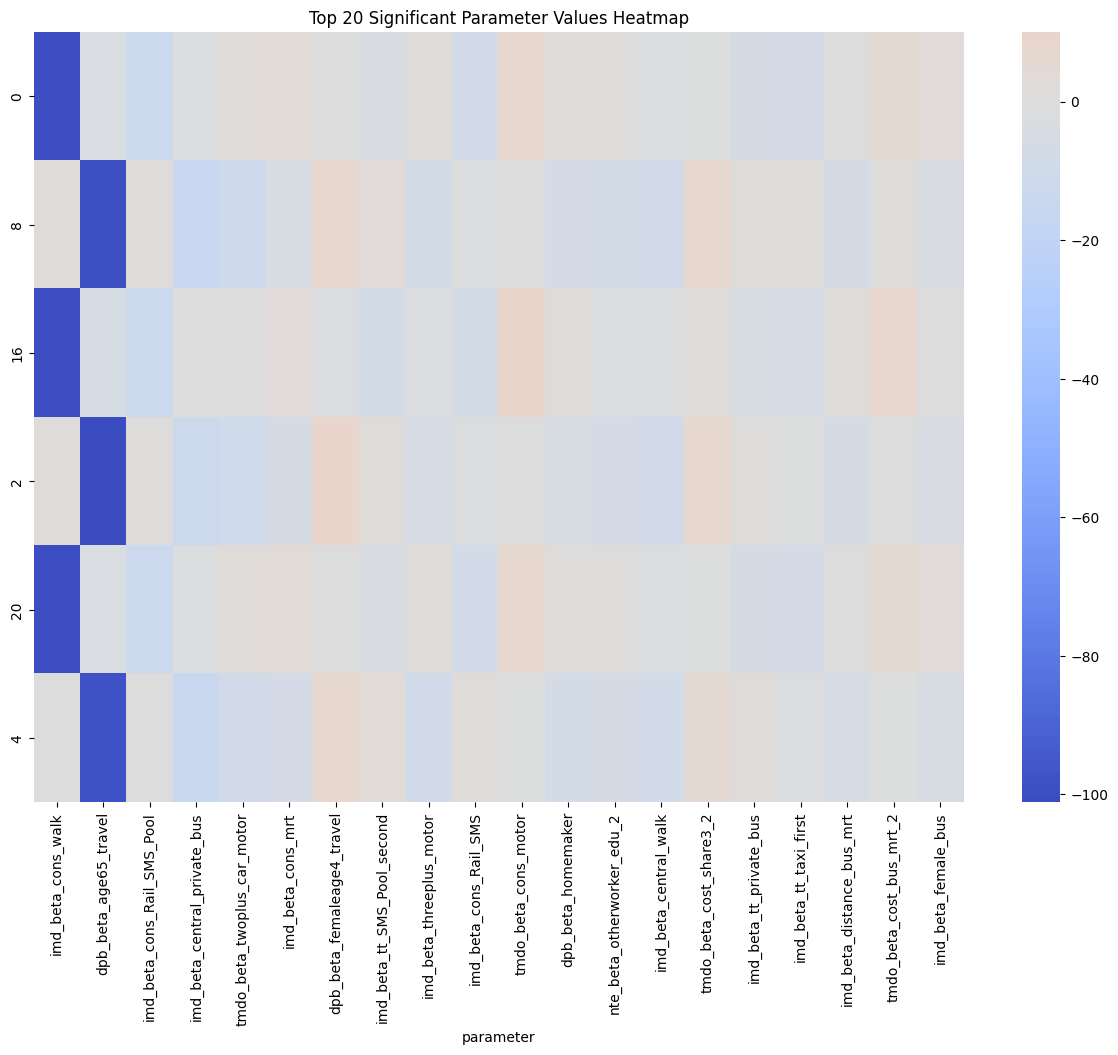

In [29]:
# Concatenate the dataframes
combined_df = pd.concat([initial.drop(columns='inadequacy'), optimal_samples5.drop(columns='inadequacy')])

# Calculate variance for each parameter and get top 20
top_20_parameters = combined_df.var().sort_values(ascending=False).head(20).index
significant_df = combined_df[top_20_parameters]

# Draw the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(significant_df, cmap='coolwarm', center=0)
plt.title('Top 20 Significant Parameter Values Heatmap')
plt.show()

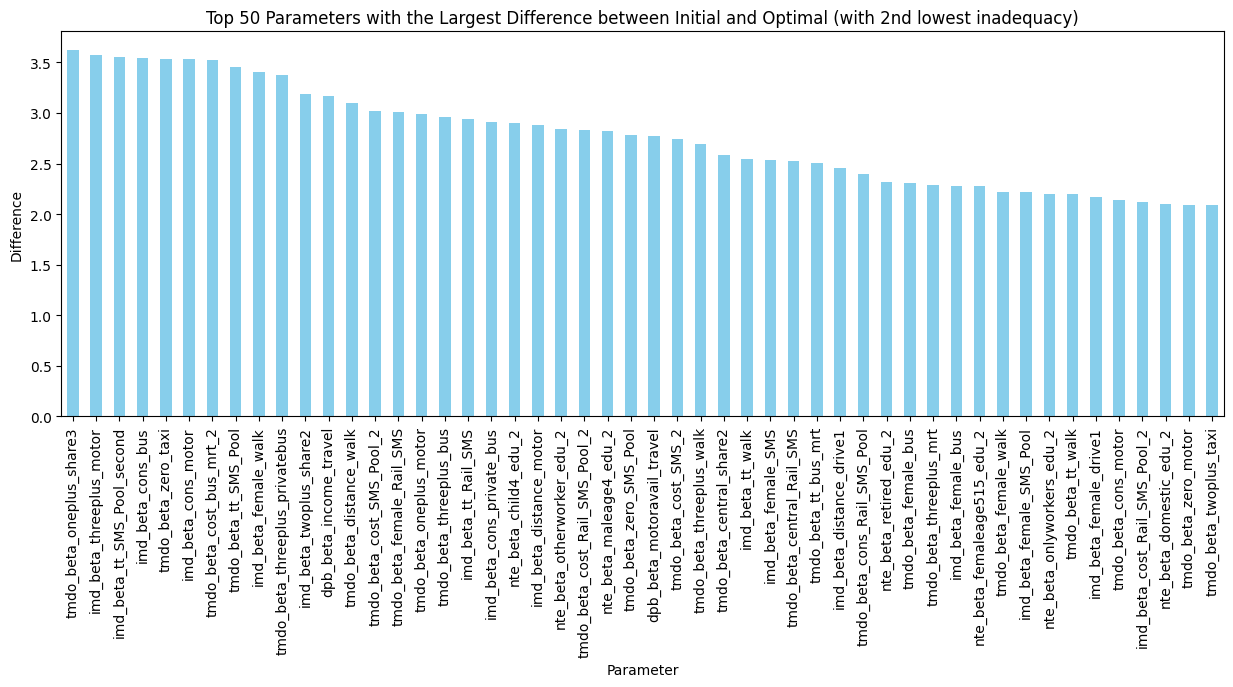

In [30]:
# Barplot of top optimized parameter vs the initial sample 
# Getting the row with the 3rd lowest inadequacy value from optimal_samples5
second_lowest_inadequacy = optimal_samples5['inadequacy'].nsmallest(2).iloc[-1]  # get the 2nd smallest value
second_lowest_inadequacy_row = optimal_samples5[optimal_samples5['inadequacy'] == second_lowest_inadequacy]

# Calculate differences
differences_second = (second_lowest_inadequacy_row.iloc[0] - initial.iloc[0]).drop('inadequacy')

# Sorting the differences and selecting top 50
top_differences_second = differences_second.abs().sort_values(ascending=False).head(50)

# Plotting the differences for the top 50 parameters
top_differences_second.plot(kind='bar', figsize=(15, 5), color='skyblue')
plt.title('Top 50 Parameters with the Largest Difference between Initial and Optimal (with 2nd lowest inadequacy)')
plt.ylabel('Difference')
plt.xlabel('Parameter')
plt.show()

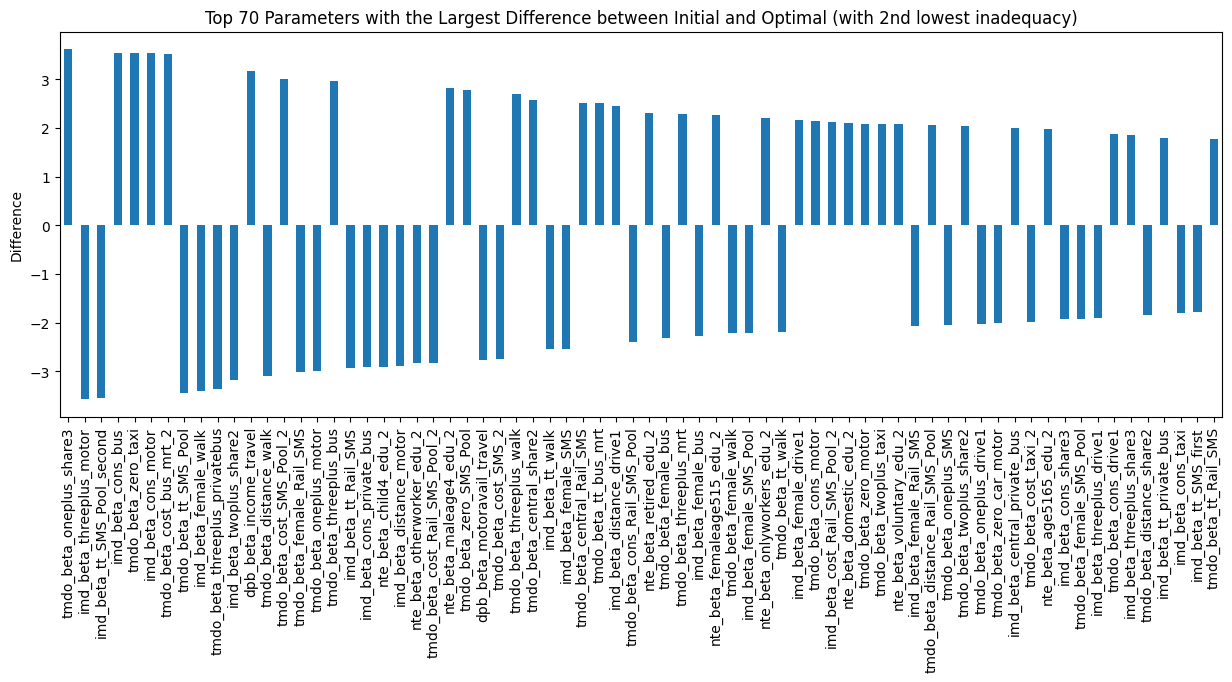

In [31]:
# Getting the row with the second lowest inadequacy value from optimal_samples5
second_lowest_inadequacy = optimal_samples5['inadequacy'].nsmallest(2).iloc[-1]  # get the 2nd smallest value
second_lowest_inadequacy_row = optimal_samples5[optimal_samples5['inadequacy'] == second_lowest_inadequacy]

# Calculate differences
differences_second = (second_lowest_inadequacy_row.iloc[0] - initial.iloc[0]).drop('inadequacy')

# Sort differences by absolute values and select top 70
top_differences_second = differences_second.abs().sort_values(ascending=False).head(70)

# Using the original differences (with signs) for plotting
differences_second[top_differences_second.index].plot(kind='bar', figsize=(15, 5))
plt.title('Top 70 Parameters with the Largest Difference between Initial and Optimal (with 2nd lowest inadequacy)')
plt.ylabel('Difference')
plt.show()

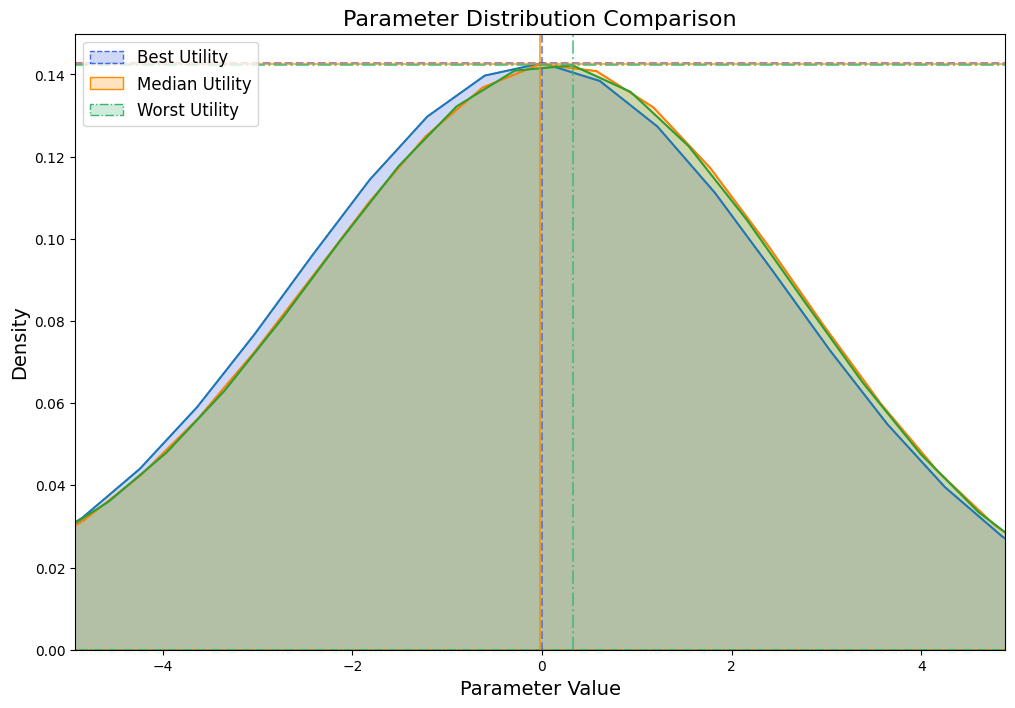

In [32]:
# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame([(list(d['space']) + [d['utility']]) for d in visuals])

# Renaming the last column to 'utility'
df.rename(columns={df.columns[-1]: 'utility'}, inplace=True)

# Identify indices of the best, median, and worst utility values
best_index = df['utility'].idxmax()
sorted_df = df.sort_values(by='utility')
median_index = sorted_df.iloc[len(sorted_df) // 2].name
worst_index = df['utility'].idxmin()

# Extract parameter distributions
best_parameters = df.iloc[best_index][0]
median_parameters = df.iloc[median_index][0]
worst_parameters = df.iloc[worst_index][0]

# Calculate interquartile range for each parameter set
def iqr_limits(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    return q25 - 1.5 * iqr, q75 + 1.5 * iqr

best_limits = iqr_limits(best_parameters)
median_limits = iqr_limits(median_parameters)
worst_limits = iqr_limits(worst_parameters)

# Define the overall limits for the x-axis
xlim_lower = min(best_limits[0], median_limits[0], worst_limits[0])
xlim_upper = max(best_limits[1], median_limits[1], worst_limits[1])

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the parameter distributions with updated styles and colors
sns.kdeplot(best_parameters, label='Best Utility', fill=True, ax=ax, color='royalblue', linestyle='--')
sns.kdeplot(median_parameters, label='Median Utility', fill=True, ax=ax, color='darkorange')
sns.kdeplot(worst_parameters, label='Worst Utility', fill=True, ax=ax, color='mediumseagreen', linestyle='-.')

# Identify the highest point of each distribution using KDE
best_kde = sns.kdeplot(best_parameters, label=None, ax=ax).get_lines()[0].get_data()
median_kde = sns.kdeplot(median_parameters, label=None, ax=ax).get_lines()[1].get_data()
worst_kde = sns.kdeplot(worst_parameters, label=None, ax=ax).get_lines()[2].get_data()

best_peak_x = best_kde[0][np.argmax(best_kde[1])]
best_peak_y = max(best_kde[1])
median_peak_x = median_kde[0][np.argmax(median_kde[1])]
median_peak_y = max(median_kde[1])
worst_peak_x = worst_kde[0][np.argmax(worst_kde[1])]
worst_peak_y = max(worst_kde[1])

# Plotting vertical lines
ax.axvline(x=best_peak_x, color='royalblue', linestyle='--', alpha=0.7)
ax.axvline(x=median_peak_x, color='darkorange', linestyle='-', alpha=0.7)
ax.axvline(x=worst_peak_x, color='mediumseagreen', linestyle='-.', alpha=0.7)

# Plotting horizontal lines
ax.axhline(y=best_peak_y, color='royalblue', linestyle='--', alpha=0.7)
ax.axhline(y=median_peak_y, color='darkorange', linestyle='-', alpha=0.7)
ax.axhline(y=worst_peak_y, color='mediumseagreen', linestyle='-.', alpha=0.7)

plt.title('Parameter Distribution Comparison', fontsize=16)
plt.xlabel('Parameter Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xlim(xlim_lower, xlim_upper)

plt.show()

In [33]:
# 3rd calibration 16 max iterations

In [34]:
# Load files
with open('visuals2.pkl', 'rb') as f:
    visuals = pickle.load(f)


with open('param_space_final2.pkl', 'rb') as f:
    param_space = pickle.load(f)



# Calculate initial sample set's inadecuacy

initial = param_space["definition"].set_index("parameter")["value"].transpose().to_frame().T
initial.reset_index(drop=True, inplace=True)
initial['inadequacy']= 20.75489

# Top 5 performers
optimal_samples5 = param_space["space"].nsmallest(5, 'inadequacy')
optimal_samples5

,dpb_beta_homemaker,dpb_beta_retired,dpb_beta_fulltime,dpb_beta_parttime,dpb_beta_selfemployed,dpb_beta_unemployed,dpb_beta_female_travel,dpb_beta_age2025_travel,dpb_beta_age2635_travel,dpb_beta_age3650_travel,...,tmdo_beta_female_share3,tmdo_beta_female_motor,tmdo_beta_female_taxi,tmdo_beta_female_SMS,tmdo_beta_female_Rail_SMS,tmdo_beta_female_walk,tmdo_beta_female_SMS_Pool,tmdo_beta_female_Rail_SMS_Pool,dpb_cons_travel,inadequacy
8,-6.479909,1.745913,-2.083886,-0.512290,0.564482,0.769772,0.691969,0.441136,-0.601609,0.577759,...,2.489497,1.319364,-0.040068,4.678905,1.010238,1.026525,0.815490,-0.408686,0.958814,17.037864
2,-4.646272,-0.226650,0.076421,0.374375,-0.800155,-0.741941,1.512513,-0.026085,-0.115682,-0.182928,...,3.337393,-0.533327,-1.330115,4.397840,1.044504,0.842932,-0.967966,-0.666040,0.526754,17.105202
24,1.005967,0.991967,5.132648,2.639221,4.268813,-0.890960,0.488666,-2.663178,-2.197958,-3.519267,...,-0.368522,1.270081,2.624706,1.628062,-0.897803,3.353710,3.139731,0.342051,2.978588,17.126937
20,1.030197,1.167143,2.915580,4.061633,1.373320,-1.962883,0.365558,-4.004743,-4.191577,-1.121054,...,1.574550,1.109090,0.394482,2.341484,2.342046,0.735446,1.439948,2.928779,2.961071,17.134702
21,0.132296,-1.577760,2.590117,2.970821,3.429339,0.115249,-1.385901,-3.519017,-3.546241,-1.482631,...,1.324401,-0.437069,2.222892,1.537147,1.138085,3.859706,2.823837,-0.046035,0.062916,17.168260


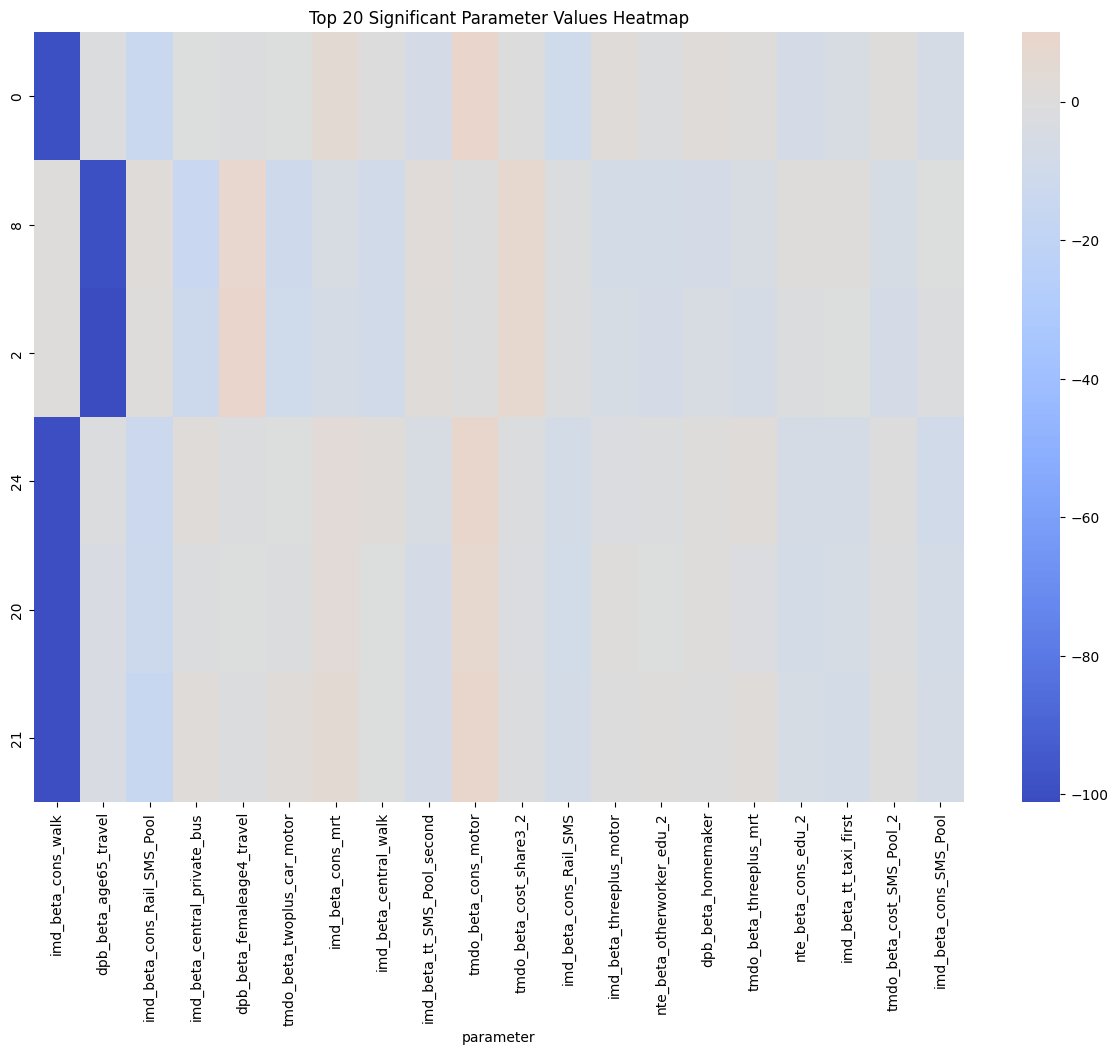

In [35]:
# Concatenate the dataframes
combined_df = pd.concat([initial.drop(columns='inadequacy'), optimal_samples5.drop(columns='inadequacy')])

# Calculate variance for each parameter and get top 20
top_20_parameters = combined_df.var().sort_values(ascending=False).head(20).index
significant_df = combined_df[top_20_parameters]

# Draw the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(significant_df, cmap='coolwarm', center=0)
plt.title('Top 20 Significant Parameter Values Heatmap')
plt.show()

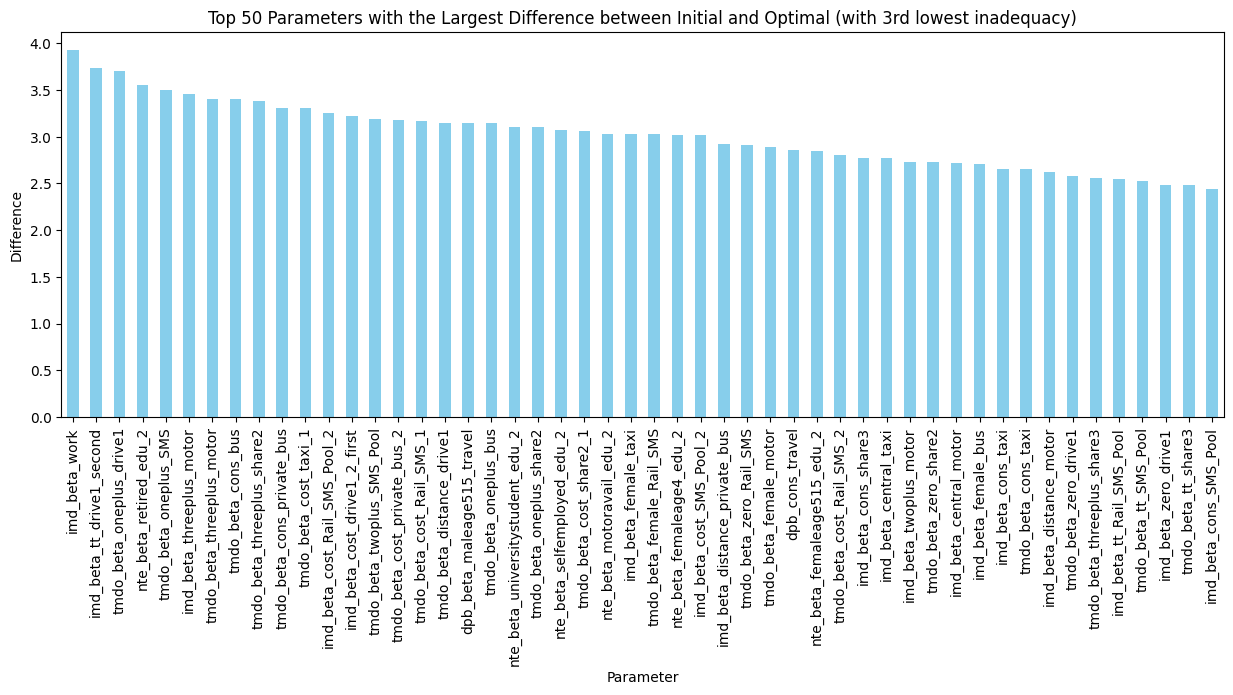

In [36]:
# Barplot of top optimized parameter vs the initial sample 
# Getting the row with the 3rd lowest inadequacy value from optimal_samples5
third_lowest_inadequacy = optimal_samples5['inadequacy'].nsmallest(3).iloc[-1]  # get the 3rd smallest value
third_lowest_inadequacy_row = optimal_samples5[optimal_samples5['inadequacy'] == third_lowest_inadequacy]

# Calculate differences
differences_third = (third_lowest_inadequacy_row.iloc[0] - initial.iloc[0]).drop('inadequacy')

# Sorting the differences and selecting top 50
top_differences_third = differences_third.abs().sort_values(ascending=False).head(50)

# Plotting the differences for the top 50 parameters
top_differences_third.plot(kind='bar', figsize=(15, 5), color='skyblue')
plt.title('Top 50 Parameters with the Largest Difference between Initial and Optimal (with 3rd lowest inadequacy)')
plt.ylabel('Difference')
plt.xlabel('Parameter')
plt.show()

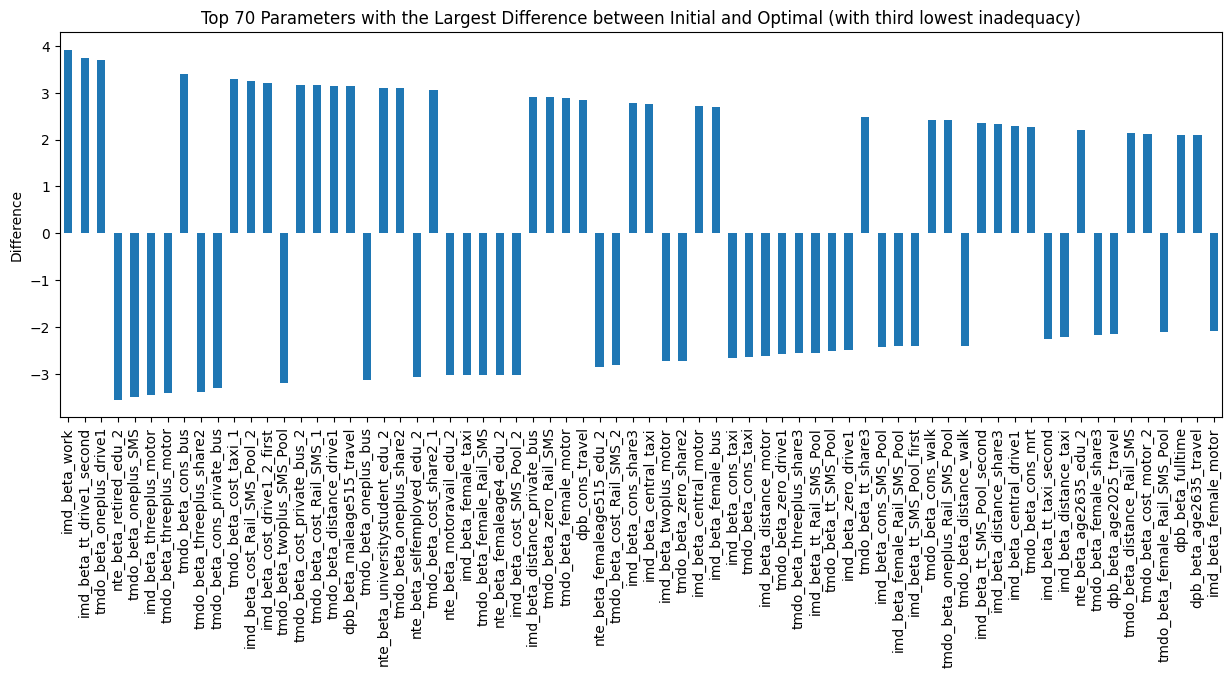

In [37]:
# Getting the row with the second lowest inadequacy value from optimal_samples5
third_lowest_inadequacy = optimal_samples5['inadequacy'].nsmallest(3).iloc[-1]  # get the third smallest value
third_lowest_inadequacy_row = optimal_samples5[optimal_samples5['inadequacy'] == third_lowest_inadequacy]

# Calculate differences
differences_third = (third_lowest_inadequacy_row.iloc[0] - initial.iloc[0]).drop('inadequacy')

# Sort differences by absolute values and select top 70
top_differences_third = differences_third.abs().sort_values(ascending=False).head(70)

# Using the original differences (with signs) for plotting
differences_third[top_differences_third.index].plot(kind='bar', figsize=(15, 5))
plt.title('Top 70 Parameters with the Largest Difference between Initial and Optimal (with third lowest inadequacy)')
plt.ylabel('Difference')
plt.show()

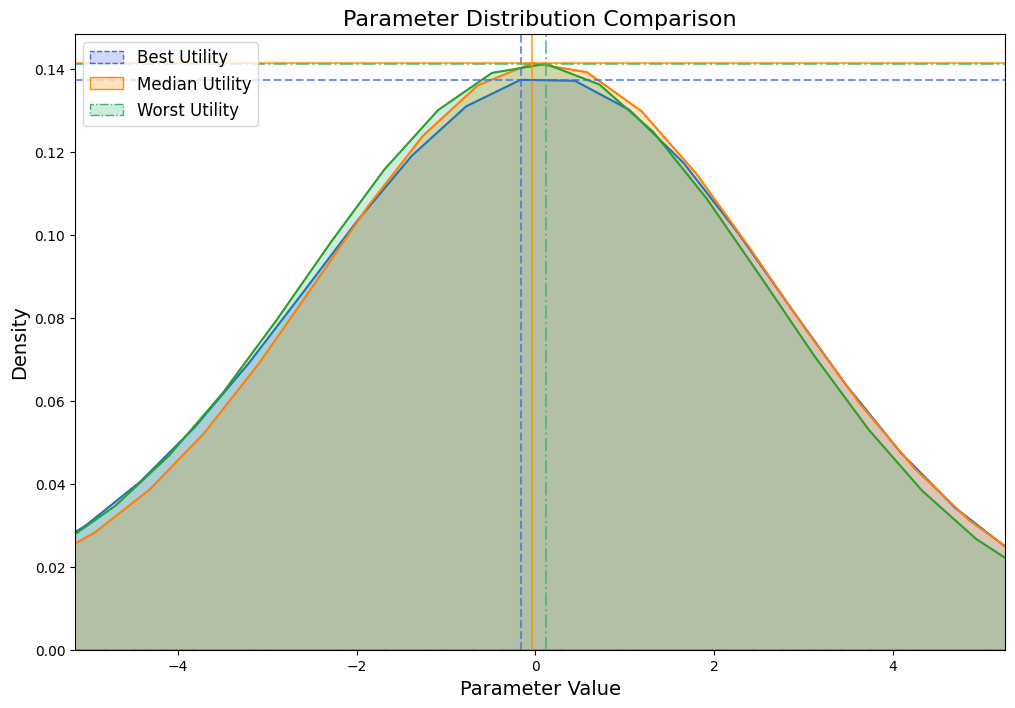

In [38]:
# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame([(list(d['space']) + [d['utility']]) for d in visuals])

# Renaming the last column to 'utility'
df.rename(columns={df.columns[-1]: 'utility'}, inplace=True)

# Identify indices of the best, median, and worst utility values
best_index = df['utility'].idxmax()
sorted_df = df.sort_values(by='utility')
median_index = sorted_df.iloc[len(sorted_df) // 2].name
worst_index = df['utility'].idxmin()

# Extract parameter distributions
best_parameters = df.iloc[best_index][0]
median_parameters = df.iloc[median_index][0]
worst_parameters = df.iloc[worst_index][0]

# Calculate interquartile range for each parameter set
def iqr_limits(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    return q25 - 1.5 * iqr, q75 + 1.5 * iqr

best_limits = iqr_limits(best_parameters)
median_limits = iqr_limits(median_parameters)
worst_limits = iqr_limits(worst_parameters)

# Define the overall limits for the x-axis
xlim_lower = min(best_limits[0], median_limits[0], worst_limits[0])
xlim_upper = max(best_limits[1], median_limits[1], worst_limits[1])

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the parameter distributions with updated styles and colors
sns.kdeplot(best_parameters, label='Best Utility', fill=True, ax=ax, color='royalblue', linestyle='--')
sns.kdeplot(median_parameters, label='Median Utility', fill=True, ax=ax, color='darkorange')
sns.kdeplot(worst_parameters, label='Worst Utility', fill=True, ax=ax, color='mediumseagreen', linestyle='-.')

# Identify the highest point of each distribution using KDE
best_kde = sns.kdeplot(best_parameters, label=None, ax=ax).get_lines()[0].get_data()
median_kde = sns.kdeplot(median_parameters, label=None, ax=ax).get_lines()[1].get_data()
worst_kde = sns.kdeplot(worst_parameters, label=None, ax=ax).get_lines()[2].get_data()

best_peak_x = best_kde[0][np.argmax(best_kde[1])]
best_peak_y = max(best_kde[1])
median_peak_x = median_kde[0][np.argmax(median_kde[1])]
median_peak_y = max(median_kde[1])
worst_peak_x = worst_kde[0][np.argmax(worst_kde[1])]
worst_peak_y = max(worst_kde[1])

# Plotting vertical lines
ax.axvline(x=best_peak_x, color='royalblue', linestyle='--', alpha=0.7)
ax.axvline(x=median_peak_x, color='darkorange', linestyle='-', alpha=0.7)
ax.axvline(x=worst_peak_x, color='mediumseagreen', linestyle='-.', alpha=0.7)

# Plotting horizontal lines
ax.axhline(y=best_peak_y, color='royalblue', linestyle='--', alpha=0.7)
ax.axhline(y=median_peak_y, color='darkorange', linestyle='-', alpha=0.7)
ax.axhline(y=worst_peak_y, color='mediumseagreen', linestyle='-.', alpha=0.7)

plt.title('Parameter Distribution Comparison', fontsize=16)
plt.xlabel('Parameter Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xlim(xlim_lower, xlim_upper)

plt.show()

In [39]:
# Last calibration  5 max iterations

In [40]:
# Load files
with open('visuals3.pkl', 'rb') as f:
    visuals = pickle.load(f)


with open('param_space_final3.pkl', 'rb') as f:
    param_space = pickle.load(f)



# Calculate initial sample set's inadecuacy

initial = param_space["definition"].set_index("parameter")["value"].transpose().to_frame().T
initial.reset_index(drop=True, inplace=True)
initial['inadequacy']= 20.75489

# Top 5 performers
optimal_samples5 = param_space["space"].nsmallest(5, 'inadequacy')
optimal_samples5

,dpb_beta_homemaker,dpb_beta_retired,dpb_beta_fulltime,dpb_beta_parttime,dpb_beta_selfemployed,dpb_beta_unemployed,dpb_beta_female_travel,dpb_beta_age2025_travel,dpb_beta_age2635_travel,dpb_beta_age3650_travel,...,tmdo_beta_female_share3,tmdo_beta_female_motor,tmdo_beta_female_taxi,tmdo_beta_female_SMS,tmdo_beta_female_Rail_SMS,tmdo_beta_female_walk,tmdo_beta_female_SMS_Pool,tmdo_beta_female_Rail_SMS_Pool,dpb_cons_travel,inadequacy
15,-1.091699,-0.642780,4.945633,4.792923,1.215429,-1.475625,0.172809,-1.314129,-1.768099,-2.571507,...,-0.989287,-1.873086,2.370049,0.968291,1.858624,3.441887,1.890088,-0.261725,2.841370,17.032737
8,-6.479909,1.745913,-2.083886,-0.512290,0.564482,0.769772,0.691969,0.441136,-0.601609,0.577759,...,2.489497,1.319364,-0.040068,4.678905,1.010238,1.026525,0.815490,-0.408686,0.958814,17.037864
11,-1.291098,-2.237076,4.740834,3.402301,0.895958,-1.923311,0.875149,-2.341044,-1.487364,-1.450491,...,1.326401,-0.575347,0.941678,0.765506,1.277669,3.121043,2.614351,2.076527,0.551195,17.076363
2,-4.646272,-0.226650,0.076421,0.374375,-0.800155,-0.741941,1.512513,-0.026085,-0.115682,-0.182928,...,3.337393,-0.533327,-1.330115,4.397840,1.044504,0.842932,-0.967966,-0.666040,0.526754,17.105202
4,-7.364318,1.967575,-0.302517,-1.944747,-1.193864,-1.038224,-1.825365,-1.498802,0.369980,0.233072,...,3.153347,0.201355,-3.075466,5.352425,1.502471,0.207859,-2.839708,-1.658212,-0.419235,17.237254


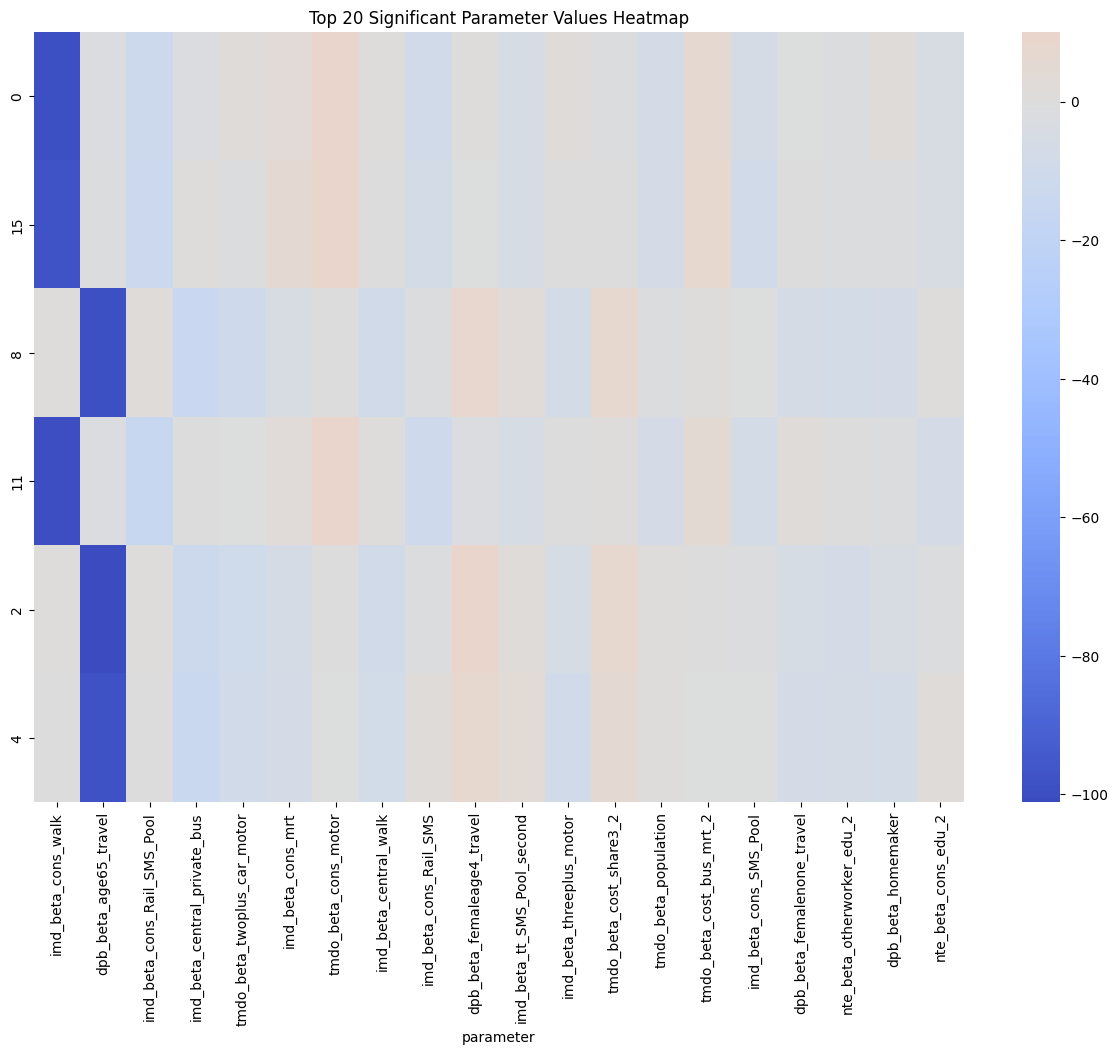

In [41]:

# Concatenate the dataframes
combined_df = pd.concat([initial.drop(columns='inadequacy'), optimal_samples5.drop(columns='inadequacy')])

# Calculate variance for each parameter and get top 20
top_20_parameters = combined_df.var().sort_values(ascending=False).head(20).index
significant_df = combined_df[top_20_parameters]

# Draw the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(significant_df, cmap='coolwarm', center=0)
plt.title('Top 20 Significant Parameter Values Heatmap')
plt.show()

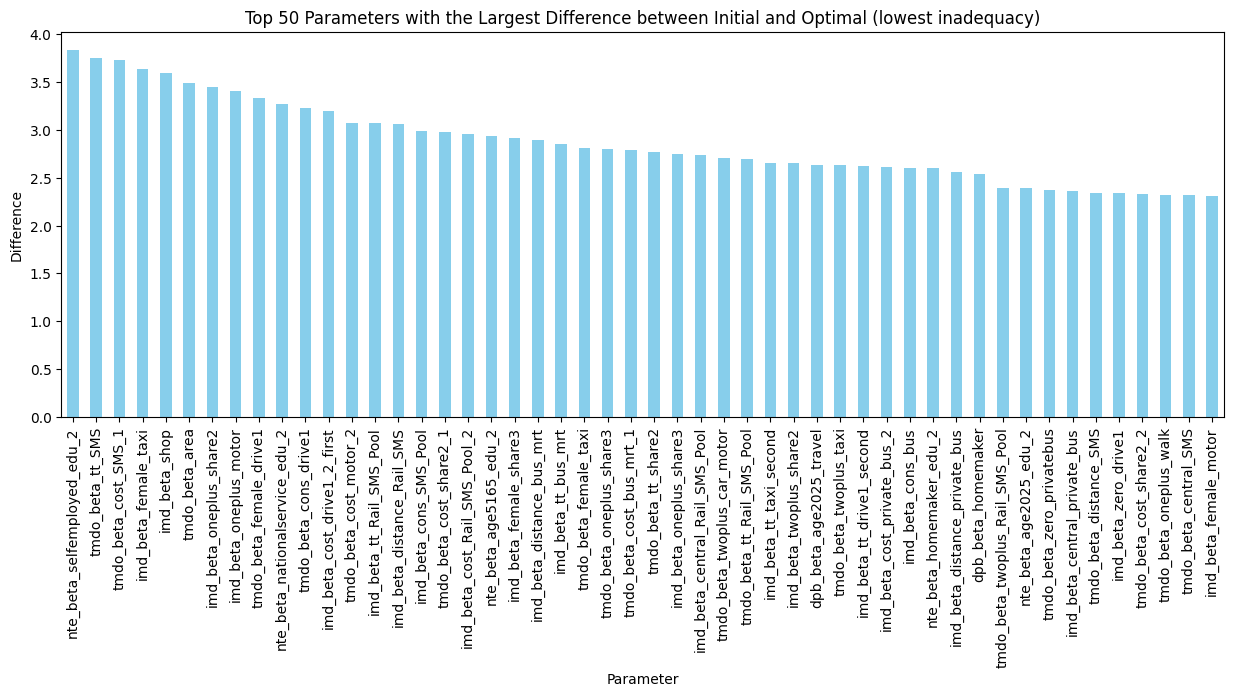

In [42]:
# Barplot of top optimized parameter vs the initial sample 
# Getting the row with the 3rd lowest inadequacy value from optimal_samples5
lowest_inadequacy = optimal_samples5['inadequacy'].nsmallest(1).iloc[-1]  # get the 3rd smallest value
lowest_inadequacy_row = optimal_samples5[optimal_samples5['inadequacy'] == lowest_inadequacy]

# Calculate differences
differences = (lowest_inadequacy_row.iloc[0] - initial.iloc[0]).drop('inadequacy')

# Sorting the differences and selecting top 50
top_differences = differences.abs().sort_values(ascending=False).head(50)

# Plotting the differences for the top 50 parameters
top_differences.plot(kind='bar', figsize=(15, 5), color='skyblue')
plt.title('Top 50 Parameters with the Largest Difference between Initial and Optimal (lowest inadequacy)')
plt.ylabel('Difference')
plt.xlabel('Parameter')
plt.show()

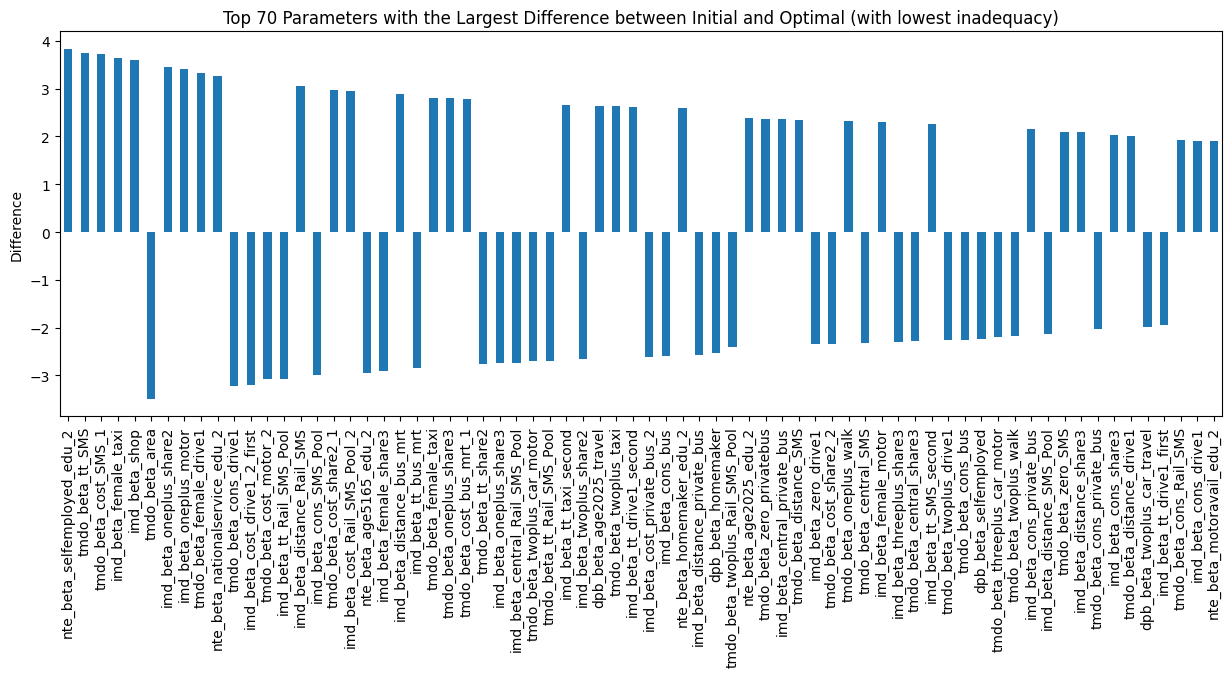

In [43]:
# Getting the row with the second lowest inadequacy value from optimal_samples5
lowest_inadequacy = optimal_samples5['inadequacy'].nsmallest(1).iloc[-1]  # get the third smallest value
lowest_inadequacy_row = optimal_samples5[optimal_samples5['inadequacy'] == lowest_inadequacy]

# Calculate differences
differences = (lowest_inadequacy_row.iloc[0] - initial.iloc[0]).drop('inadequacy')

# Sort differences by absolute values and select top 70
top_differences = differences.abs().sort_values(ascending=False).head(70)

# Using the original differences (with signs) for plotting
differences[top_differences.index].plot(kind='bar', figsize=(15, 5))
plt.title('Top 70 Parameters with the Largest Difference between Initial and Optimal (with lowest inadequacy)')
plt.ylabel('Difference')
plt.show()

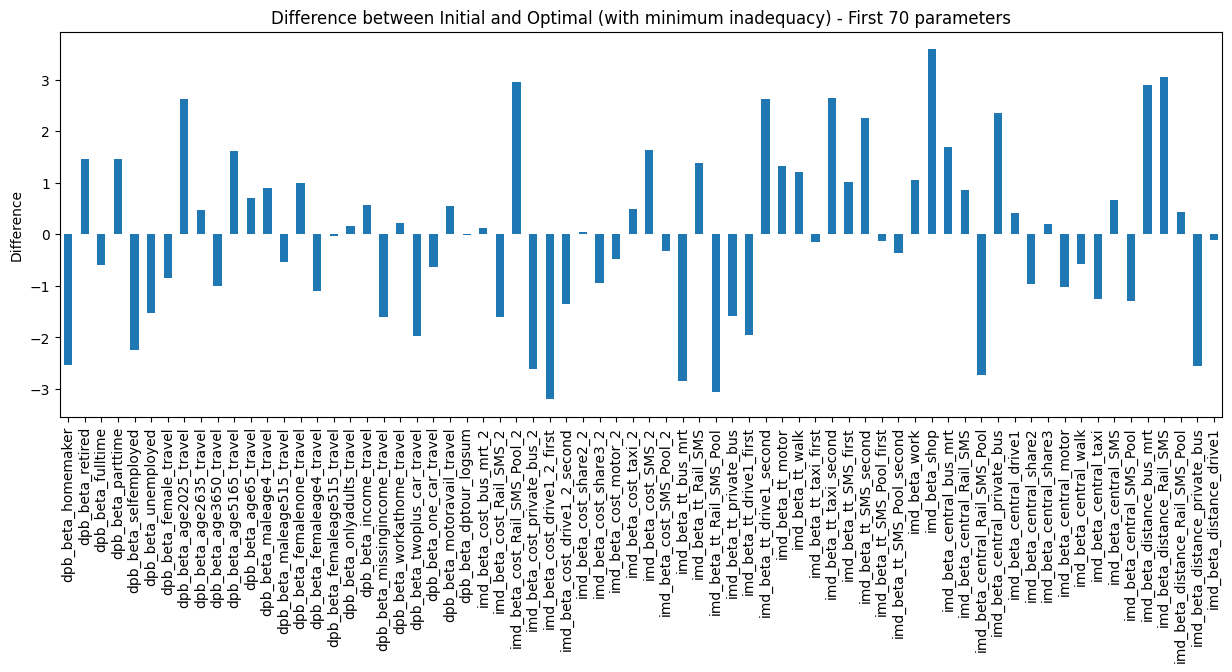

In [45]:
# Getting the row with the minimum inadequacy value from optimal_samples5
min_inadequacy_row = optimal_samples5[optimal_samples5['inadequacy'] == optimal_samples5['inadequacy'].min()]

# Calculate differences
differences = min_inadequacy_row.iloc[0] - initial.iloc[0]
half_length = len(differences.drop('inadequacy')) // 4
  # Calculate the midpoint

# Plot the first half of differences
differences.drop('inadequacy').iloc[:half_length].plot(kind='bar', figsize=(15, 5))
plt.title('Difference between Initial and Optimal (with minimum inadequacy) - First 70 parameters')
plt.ylabel('Difference')
plt.show()

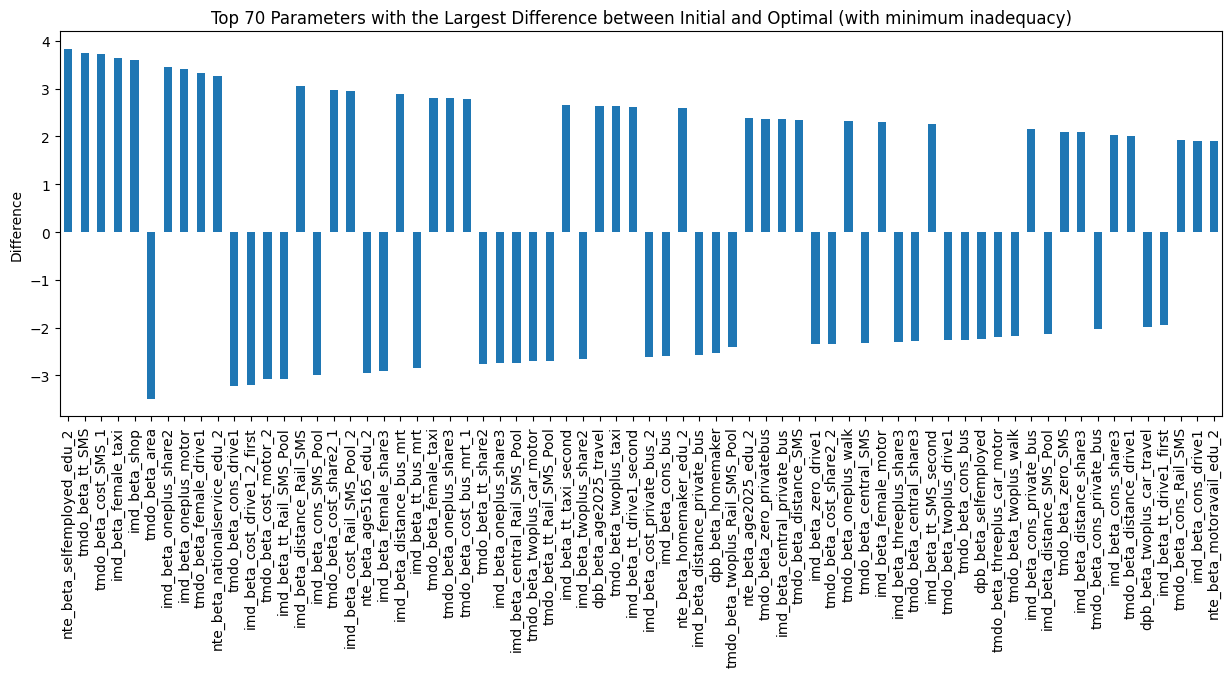

In [46]:
# Getting the row with the minimum inadequacy value from optimal_samples5
min_inadequacy_row = optimal_samples5[optimal_samples5['inadequacy'] == optimal_samples5['inadequacy'].min()]

# Calculate differences
differences = (min_inadequacy_row.iloc[0] - initial.iloc[0]).drop('inadequacy')

# Sort differences by absolute values and select top 70
top_differences = differences.abs().sort_values(ascending=False).head(70)

# Using the original differences (with signs) for plotting
differences[top_differences.index].plot(kind='bar', figsize=(15, 5))
plt.title('Top 70 Parameters with the Largest Difference between Initial and Optimal (with minimum inadequacy)')
plt.ylabel('Difference')
plt.show()

In [47]:
# Percentages of Improvement 

# first run 
in_percentage_improvement = ((20.75489 - 17.037864) / 20.75489) * 100
print(in_percentage_improvement)

our_percentage_improvement = ((20.75489 - 17.101248) / 20.75489) * 100
print(our_percentage_improvement)

# second run
our_percentage_improvement = ((20.75489 - 17.126937) / 20.75489) * 100
print(our_percentage_improvement)

# third run
our_percentage_improvement = ((20.75489 - 17.032737) / 20.75489) * 100
print(our_percentage_improvement)

17.909157793657304
17.603764703161527
17.479991462252983
17.933860405909154
